In [8]:
import os, shutil, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation, BatchNormalization
from keras.regularizers import l2
from sklearn.utils import class_weight 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [10]:
def plot_loss_metrics(result):
    history = result.history

    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

    plt.figure()
    plt.plot(history['val_recall'])
    plt.plot(history['recall'])
    plt.legend(['val_recall', 'recall'])
    plt.title('Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.show()

In [11]:
train_dir = 'Human_Face_Regonition_Images\\split3\\train'
validation_dir = 'Human_Face_Regonition_Images\\split3\\validation'
test_dir = 'Human_Face_Regonition_Images\\split3\\test'

In [12]:
data_gen_aug = ImageDataGenerator(rescale=1./255, 
                                        rotation_range=30, 
                                        width_shift_range=.1, 
                                        height_shift_range=.1,
                                        horizontal_flip=True,
                                        zoom_range=0.1)
                                        
train_generator_aug = data_gen_aug.flow_from_directory(train_dir, target_size=(256, 256), batch_size=128)

validation_generator_aug = data_gen_aug.flow_from_directory(validation_dir, target_size=(256, 256), batch_size=128)

test_generator_aug = data_gen_aug.flow_from_directory(test_dir, target_size=(256, 256), batch_size=128)

Found 16000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.
Found 3108 images belonging to 5 classes.


In [13]:
train_imgs_aug, train_labels_aug = next(train_generator_aug)
validation_imgs_aug, validation_labels_aug = next(validation_generator_aug)
test_imgs_aug, test_labels_aug = next(test_generator_aug)

train_images_aug = train_imgs_aug.reshape(train_imgs_aug.shape[0], -1)
validation_images_aug = validation_imgs_aug.reshape(validation_imgs_aug.shape[0], -1)
test_images_aug = test_imgs_aug.reshape(test_imgs_aug.shape[0], -1)

print(train_images_aug.shape, validation_images_aug.shape, test_images_aug.shape)

(128, 196608) (128, 196608) (128, 196608)


## Baseline Model

In [15]:
model = models.Sequential()
model.add(Dense(128, activation='relu', input_shape=(196608,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])

result = model.fit(train_images_aug, train_labels_aug,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_images_aug, validation_labels_aug))

Epoch 1/15
2/2 [==============================] - 2s 1s/step - loss: 4.4117 - accuracy: 0.2500 - recall: 0.1172 - val_loss: 11.6458 - val_accuracy: 0.1406 - val_recall: 0.1406
Epoch 2/15
2/2 [==============================] - 0s 274ms/step - loss: 8.3595 - accuracy: 0.1641 - recall: 0.1641 - val_loss: 20.9290 - val_accuracy: 0.2422 - val_recall: 0.2422
Epoch 3/15
2/2 [==============================] - 0s 274ms/step - loss: 14.5987 - accuracy: 0.2656 - recall: 0.2656 - val_loss: 6.6659 - val_accuracy: 0.2188 - val_recall: 0.2188
Epoch 4/15
2/2 [==============================] - 0s 289ms/step - loss: 5.3736 - accuracy: 0.2031 - recall: 0.2031 - val_loss: 7.2752 - val_accuracy: 0.1406 - val_recall: 0.1406
Epoch 5/15
2/2 [==============================] - 0s 304ms/step - loss: 12.4704 - accuracy: 0.1562 - recall: 0.1562 - val_loss: 9.4619 - val_accuracy: 0.2422 - val_recall: 0.2422
Epoch 6/15
2/2 [==============================] - 0s 254ms/step - loss: 13.2756 - accuracy: 0.2578 - recall: 

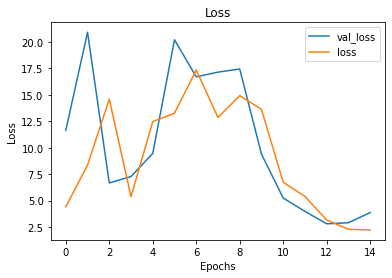

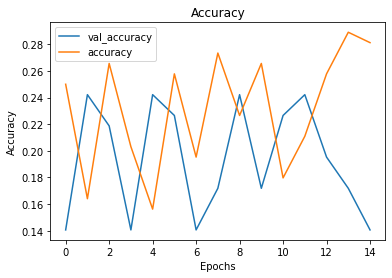

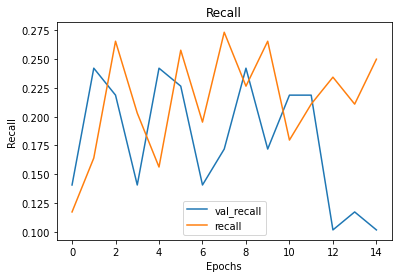

In [16]:
plot_loss_metrics(result)

In [17]:
result_train_aug = model.evaluate(train_images_aug, train_labels_aug)
result_validation_aug = model.evaluate(validation_images_aug, validation_labels_aug)
result_test_aug = model.evaluate(test_images_aug, test_labels_aug)

print(result_train_aug, result_validation_aug, result_test_aug)

4/4 [==============================] - 0s 15ms/step - loss: 3.8906 - accuracy: 0.2109 - recall: 0.1016
[2.448725700378418, 0.34375, 0.2734375] [3.863617420196533, 0.140625, 0.1015625] [3.890584945678711, 0.2109375, 0.1015625]


## CNN Models

In [18]:
cnn_model_aug = models.Sequential()

cnn_model_aug.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug.add(MaxPooling2D((2, 2)))
cnn_model_aug.add(Flatten())
cnn_model_aug.add(Dense(64, activation='relu'))
cnn_model_aug.add(Dense(32, activation='relu'))
cnn_model_aug.add(Dense(16, activation='relu'))
cnn_model_aug.add(Dense(5, activation='softmax'))

cnn_model_aug.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])

result = cnn_model_aug.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 289s 7s/step - loss: 1.6083 - accuracy: 0.2201 - recall: 0.0000e+00 - val_loss: 1.5949 - val_accuracy: 0.2453 - val_recall: 0.0000e+00
Epoch 2/15
40/40 [==============================] - 275s 7s/step - loss: 1.5788 - accuracy: 0.2666 - recall: 0.0023 - val_loss: 1.5508 - val_accuracy: 0.3034 - val_recall: 0.0000e+00
Epoch 3/15
40/40 [==============================] - 279s 7s/step - loss: 1.5422 - accuracy: 0.3158 - recall: 0.0096 - val_loss: 1.5393 - val_accuracy: 0.3009 - val_recall: 0.0012
Epoch 4/15
40/40 [==============================] - 290s 7s/step - loss: 1.5263 - accuracy: 0.3314 - recall: 0.0219 - val_loss: 1.5067 - val_accuracy: 0.3316 - val_recall: 0.0850
Epoch 5/15
40/40 [==============================] - 304s 7s/step - loss: 1.5001 - accuracy: 0.3344 - recall: 0.0545 - val_loss: 1.4718 - val_accuracy: 0.3519 - val_recall: 0.0959
Epoch 6/15
40/40 [==============================] - 287s 7s/step - loss: 1.4908 - accuracy: 0

In [19]:
cnn_result_train_aug = cnn_model_aug.evaluate(train_generator_aug)
cnn_result_validation_aug = cnn_model_aug.evaluate(validation_generator_aug)
cnn_result_test_aug = cnn_model_aug.evaluate(test_generator_aug)

print(cnn_result_train_aug, cnn_result_validation_aug, cnn_result_test_aug)

25/25 [==============================] - 65s 3s/step - loss: 1.3310 - accuracy: 0.4221 - recall: 0.1258
[1.336323618888855, 0.41606250405311584, 0.12687499821186066] [1.3473824262619019, 0.4050000011920929, 0.12160000205039978] [1.3309515714645386, 0.42213642597198486, 0.1258043795824051]


#### Adding Drop layers

In [20]:
cnn_model_aug2 = models.Sequential()

cnn_model_aug2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Dropout(0.25))
cnn_model_aug2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug2.add(MaxPooling2D((2, 2)))
cnn_model_aug2.add(Dropout(0.25))
cnn_model_aug2.add(Flatten())
cnn_model_aug2.add(Dense(64, activation='relu'))
cnn_model_aug2.add(Dense(32, activation='relu'))
cnn_model_aug2.add(Dense(16, activation='relu'))
cnn_model_aug2.add(Dense(5, activation='softmax'))

cnn_model_aug2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])

result2 = cnn_model_aug2.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 253s 6s/step - loss: 1.6000 - accuracy: 0.2451 - recall: 0.0000e+00 - val_loss: 1.5980 - val_accuracy: 0.2256 - val_recall: 0.0000e+00
Epoch 2/15
40/40 [==============================] - 250s 6s/step - loss: 1.5754 - accuracy: 0.2615 - recall: 0.0096 - val_loss: 1.5775 - val_accuracy: 0.3025 - val_recall: 0.0000e+00
Epoch 3/15
40/40 [==============================] - 250s 6s/step - loss: 1.5326 - accuracy: 0.3080 - recall: 0.0180 - val_loss: 1.5129 - val_accuracy: 0.3369 - val_recall: 6.2500e-04
Epoch 4/15
40/40 [==============================] - 250s 6s/step - loss: 1.4997 - accuracy: 0.3318 - recall: 0.0482 - val_loss: 1.4864 - val_accuracy: 0.3534 - val_recall: 0.0137
Epoch 5/15
40/40 [==============================] - 295s 7s/step - loss: 1.4840 - accuracy: 0.3414 - recall: 0.0529 - val_loss: 1.5333 - val_accuracy: 0.2972 - val_recall: 0.0019
Epoch 6/15
40/40 [==============================] - 315s 8s/step - loss: 1.4814 - accurac

In [21]:
cnn_result_train_aug2 = cnn_model_aug2.evaluate(train_generator_aug)
cnn_result_validation_aug2 = cnn_model_aug2.evaluate(validation_generator_aug)
cnn_result_test_aug2 = cnn_model_aug2.evaluate(test_generator_aug)

print(cnn_result_train_aug2, cnn_result_validation_aug2, cnn_result_test_aug2)

25/25 [==============================] - 56s 2s/step - loss: 1.3300 - accuracy: 0.4225 - recall: 0.1174
[1.331594467163086, 0.4180625081062317, 0.11912500113248825] [1.3359681367874146, 0.41620001196861267, 0.11840000003576279] [1.3300310373306274, 0.4224581718444824, 0.11743886768817902]


#### Add More Layers

In [23]:
cnn_model_aug3 = models.Sequential()

cnn_model_aug3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Dropout(0.25))
cnn_model_aug3.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug3.add(MaxPooling2D((2, 2)))
cnn_model_aug3.add(Dropout(0.25))
cnn_model_aug3.add(Flatten())
cnn_model_aug3.add(Dense(256, activation='relu'))
cnn_model_aug3.add(Dense(128, activation='relu'))
cnn_model_aug3.add(Dense(32, activation='relu'))
cnn_model_aug3.add(Dense(16, activation='relu'))
cnn_model_aug3.add(Dense(5, activation='softmax'))

cnn_model_aug3.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])

result3 = cnn_model_aug3.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 330s 8s/step - loss: 1.6044 - accuracy: 0.2314 - recall: 0.0000e+00 - val_loss: 1.6025 - val_accuracy: 0.2550 - val_recall: 0.0000e+00
Epoch 2/15
40/40 [==============================] - 304s 8s/step - loss: 1.5812 - accuracy: 0.2701 - recall: 0.0018 - val_loss: 1.5714 - val_accuracy: 0.2806 - val_recall: 0.0244
Epoch 3/15
40/40 [==============================] - 309s 8s/step - loss: 1.5624 - accuracy: 0.2945 - recall: 0.0098 - val_loss: 1.5309 - val_accuracy: 0.3319 - val_recall: 0.0328
Epoch 4/15
40/40 [==============================] - 317s 8s/step - loss: 1.5279 - accuracy: 0.3178 - recall: 0.0289 - val_loss: 1.5103 - val_accuracy: 0.3328 - val_recall: 0.0362
Epoch 5/15
40/40 [==============================] - 316s 8s/step - loss: 1.5243 - accuracy: 0.3211 - recall: 0.0340 - val_loss: 1.5266 - val_accuracy: 0.3247 - val_recall: 0.0019
Epoch 6/15
40/40 [==============================] - 333s 8s/step - loss: 1.4911 - accuracy: 0.331

In [24]:
cnn_result_train_aug3 = cnn_model_aug3.evaluate(train_generator_aug)
cnn_result_validation_aug3 = cnn_model_aug3.evaluate(validation_generator_aug)
cnn_result_test_aug3 = cnn_model_aug3.evaluate(test_generator_aug)

print(cnn_result_train_aug3, cnn_result_validation_aug3, cnn_result_test_aug3)

25/25 [==============================] - 60s 2s/step - loss: 1.3263 - accuracy: 0.4163 - recall: 0.1178
[1.3349798917770386, 0.42143750190734863, 0.11768750101327896] [1.3485873937606812, 0.41940000653266907, 0.11620000004768372] [1.3263393640518188, 0.41634491086006165, 0.11776062101125717]


In [25]:
cnn_model_aug4 = models.Sequential()

cnn_model_aug4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug4.add(BatchNormalization())
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Dropout(0.25))
cnn_model_aug4.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug4.add(BatchNormalization())
cnn_model_aug4.add(MaxPooling2D((2, 2)))
cnn_model_aug4.add(Dropout(0.25))
cnn_model_aug4.add(Flatten())
cnn_model_aug4.add(Dense(256, activation='relu'))
cnn_model_aug4.add(Dense(128, activation='relu'))
cnn_model_aug4.add(BatchNormalization())
cnn_model_aug4.add(Dense(32, activation='relu'))
cnn_model_aug4.add(Dense(16, activation='relu'))
cnn_model_aug4.add(Dense(5, activation='softmax'))

cnn_model_aug4.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])

result4 = cnn_model_aug4.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 347s 9s/step - loss: 1.6110 - accuracy: 0.2877 - recall: 0.0688 - val_loss: 1.9979 - val_accuracy: 0.2559 - val_recall: 0.1169
Epoch 2/15
40/40 [==============================] - 349s 9s/step - loss: 1.5203 - accuracy: 0.3217 - recall: 0.0580 - val_loss: 2.0197 - val_accuracy: 0.1966 - val_recall: 0.1609
Epoch 3/15
40/40 [==============================] - 339s 8s/step - loss: 1.4933 - accuracy: 0.3420 - recall: 0.0680 - val_loss: 2.2228 - val_accuracy: 0.1922 - val_recall: 0.1922
Epoch 4/15
40/40 [==============================] - 327s 8s/step - loss: 1.4606 - accuracy: 0.3525 - recall: 0.0779 - val_loss: 2.2417 - val_accuracy: 0.1984 - val_recall: 0.1975
Epoch 5/15
40/40 [==============================] - 320s 8s/step - loss: 1.4582 - accuracy: 0.3613 - recall: 0.0871 - val_loss: 2.1340 - val_accuracy: 0.1919 - val_recall: 0.1919
Epoch 6/15
40/40 [==============================] - 317s 8s/step - loss: 1.4343 - accuracy: 0.3668 - reca

In [26]:
cnn_result_train_aug4 = cnn_model_aug4.evaluate(train_generator_aug)
cnn_result_validation_aug4 = cnn_model_aug4.evaluate(validation_generator_aug)
cnn_result_test_aug4 = cnn_model_aug4.evaluate(test_generator_aug)

print(cnn_result_train_aug4, cnn_result_validation_aug4, cnn_result_test_aug4)

25/25 [==============================] - 61s 2s/step - loss: 1.8502 - accuracy: 0.2683 - recall: 0.1754
[1.8909319639205933, 0.25343748927116394, 0.16181249916553497] [1.8644468784332275, 0.2549999952316284, 0.16500000655651093] [1.8502285480499268, 0.26833978295326233, 0.17535392940044403]


In [29]:
cnn_model_aug5 = models.Sequential()

cnn_model_aug5.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01), input_shape=(256, 256, 3)))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Dropout(0.25))
cnn_model_aug5.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Dropout(0.25))
cnn_model_aug5.add(Flatten())
cnn_model_aug5.add(Dense(64, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_aug5.add(Dense(32, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_aug5.add(Dense(16, activation='relu', kernel_regularizer=l2(l2=0.01)))
cnn_model_aug5.add(Dense(5, activation='softmax'))

cnn_model_aug5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])

result5 = cnn_model_aug5.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 275s 7s/step - loss: 3.9150 - accuracy: 0.2188 - recall: 0.0041 - val_loss: 2.7623 - val_accuracy: 0.2172 - val_recall: 0.0000e+00
Epoch 2/15
40/40 [==============================] - 252s 6s/step - loss: 2.4029 - accuracy: 0.2627 - recall: 0.0000e+00 - val_loss: 2.1652 - val_accuracy: 0.2669 - val_recall: 0.0000e+00
Epoch 3/15
40/40 [==============================] - 274s 7s/step - loss: 2.0321 - accuracy: 0.2867 - recall: 0.0061 - val_loss: 1.9575 - val_accuracy: 0.2716 - val_recall: 0.0000e+00
Epoch 4/15
40/40 [==============================] - 277s 7s/step - loss: 1.8754 - accuracy: 0.2973 - recall: 0.0111 - val_loss: 1.8284 - val_accuracy: 0.3147 - val_recall: 0.0000e+00
Epoch 5/15
40/40 [==============================] - 279s 7s/step - loss: 1.7758 - accuracy: 0.3145 - recall: 0.0064 - val_loss: 1.7358 - val_accuracy: 0.3294 - val_recall: 0.0153
Epoch 6/15
40/40 [==============================] - 268s 7s/step - loss: 1.7089 - acc

In [30]:
cnn_result_train_aug5 = cnn_model_aug5.evaluate(train_generator_aug)
cnn_result_validation_aug5 = cnn_model_aug5.evaluate(validation_generator_aug)
cnn_result_test_aug5 = cnn_model_aug5.evaluate(test_generator_aug)

print(cnn_result_train_aug5, cnn_result_validation_aug5, cnn_result_test_aug5)

25/25 [==============================] - 53s 2s/step - loss: 1.5737 - accuracy: 0.3285 - recall: 0.0071
[1.5812952518463135, 0.32868748903274536, 0.009999999776482582] [1.5876986980438232, 0.32120001316070557, 0.00839999970048666] [1.5737195014953613, 0.32850706577301025, 0.007078506983816624]


#### Class Weights

In [31]:
weight = class_weight.compute_class_weight(
           'balanced',
            np.unique(train_generator_aug.classes), 
            train_generator_aug.classes)

train_class_weights = dict(enumerate(weight))
train_class_weights

C:\Users\soohy\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4], y=[0 0 0 ... 4 4 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{0: 0.9216589861751152,
 1: 0.9577970667464831,
 2: 0.9088327179778471,
 3: 1.2260536398467432,
 4: 1.0471204188481675}

In [37]:
cnn_model_aug5 = models.Sequential()

cnn_model_aug5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Conv2D(256, (3, 3), activation='relu'))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Dropout(0.25))
cnn_model_aug5.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model_aug5.add(MaxPooling2D((2, 2)))
cnn_model_aug5.add(Dropout(0.25))
cnn_model_aug5.add(Flatten())
cnn_model_aug5.add(Dense(256, activation='relu'))
cnn_model_aug5.add(Dense(128, activation='relu'))
cnn_model_aug5.add(Dense(32, activation='relu'))
cnn_model_aug5.add(Dense(16, activation='relu'))
cnn_model_aug5.add(Dense(6, activation='softmax'))

cnn_model_aug5.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])

result5 = cnn_model_aug5.fit(train_generator_aug,
                    steps_per_epoch=40,
                    epochs=15,
                    batch_size=64,
                    class_weight=train_class_weights,
                    validation_data=(validation_generator_aug),
                    validation_steps=25)

Epoch 1/15
40/40 [==============================] - 360s 9s/step - loss: 1.8066 - accuracy: 0.1461 - recall: 0.0000e+00 - val_loss: 1.8327 - val_accuracy: 0.1444 - val_recall: 0.0000e+00
Epoch 2/15
40/40 [==============================] - 351s 9s/step - loss: 1.7713 - accuracy: 0.1305 - recall: 0.0000e+00 - val_loss: 1.7644 - val_accuracy: 0.2028 - val_recall: 0.0000e+00
Epoch 3/15
40/40 [==============================] - 342s 9s/step - loss: 1.7220 - accuracy: 0.2422 - recall: 0.0051 - val_loss: 1.6537 - val_accuracy: 0.2991 - val_recall: 0.0197
Epoch 4/15
40/40 [==============================] - 334s 8s/step - loss: 1.6959 - accuracy: 0.2777 - recall: 0.0207 - val_loss: 1.6346 - val_accuracy: 0.3034 - val_recall: 0.0034
Epoch 5/15
40/40 [==============================] - 331s 8s/step - loss: 1.6804 - accuracy: 0.2738 - recall: 0.0182 - val_loss: 1.6647 - val_accuracy: 0.2956 - val_recall: 0.0094
Epoch 6/15
40/40 [==============================] - 340s 9s/step - loss: 1.6525 - accurac

In [38]:
cnn_result_train_aug5 = cnn_model_aug5.evaluate(train_generator_aug)
cnn_result_validation_aug5 = cnn_model_aug5.evaluate(validation_generator_aug)
cnn_result_test_aug5 = cnn_model_aug5.evaluate(test_generator_aug)

print(cnn_result_train_aug5, cnn_result_validation_aug5, cnn_result_test_aug5)

25/25 [==============================] - 63s 2s/step - loss: 1.5077 - accuracy: 0.3497 - recall: 0.0595
[1.502455234527588, 0.35624998807907104, 0.06031249836087227] [1.5120277404785156, 0.3449999988079071, 0.055799998342990875] [1.5076711177825928, 0.349742591381073, 0.0595238097012043]
